In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt #data plotting and visualization
import seaborn as sns #data visualization

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pga-tour-data-2010-2018/pgaTourData.csv


In [2]:
df_PGA = pd.read_csv('/kaggle/input/pga-tour-data-2010-2018/pgaTourData.csv')
df_PGA.head()

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,NaN,5.0,-0.207,1.153,0.427,0.960,-0.027,"$2,680,487"
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,"1,006",1.0,3.0,-0.058,0.337,-0.012,0.213,0.194,"$2,485,203"
2,Chez Reavie,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,"1,020",NaN,3.0,0.192,0.674,0.183,0.437,-0.137,"$2,700,018"
3,Ryan Moore,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,NaN,5.0,-0.271,0.941,0.406,0.532,0.273,"$1,986,608"
4,Brian Stuard,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,NaN,3.0,0.164,0.062,-0.227,0.099,0.026,"$1,089,763"


In [3]:
df_PGA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312 entries, 0 to 2311
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player Name         2312 non-null   object 
 1   Rounds              1678 non-null   float64
 2   Fairway Percentage  1678 non-null   float64
 3   Year                2312 non-null   int64  
 4   Avg Distance        1678 non-null   float64
 5   gir                 1678 non-null   float64
 6   Average Putts       1678 non-null   float64
 7   Average Scrambling  1678 non-null   float64
 8   Average Score       1678 non-null   float64
 9   Points              2296 non-null   object 
 10  Wins                293 non-null    float64
 11  Top 10              1458 non-null   float64
 12  Average SG Putts    1678 non-null   float64
 13  Average SG Total    1678 non-null   float64
 14  SG:OTT              1678 non-null   float64
 15  SG:APR              1678 non-null   float64
 16  SG:ARG

In [3]:
df_PGA['Wins'].replace(np.nan, '0', inplace = True)
df_PGA['Top 10'].replace(np.nan, '0', inplace = True)

df_PGA.dropna(axis = 0, inplace = True) #any entry where a player made no money is dropped
df_PGA.set_index('Player Name', inplace = True)

df_PGA

,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
Player Name,,,,,,,,,,,,,,,,,
Henrik Stenson,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,0,5,-0.207,1.153,0.427,0.960,-0.027,"$2,680,487"
Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,"1,006",1,3,-0.058,0.337,-0.012,0.213,0.194,"$2,485,203"
Chez Reavie,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,"1,020",0,3,0.192,0.674,0.183,0.437,-0.137,"$2,700,018"
Ryan Moore,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,0,5,-0.271,0.941,0.406,0.532,0.273,"$1,986,608"
Brian Stuard,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,0,3,0.164,0.062,-0.227,0.099,0.026,"$1,089,763"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Phil Mickelson,76.0,52.66,2010,299.1,65.13,28.79,61.84,69.966,"1,629",1,5,-0.147,1.001,0.185,0.738,0.228,"3,821,733"
John Daly,63.0,52.21,2010,305.7,65.66,29.78,53.53,71.697,97,0,0,-0.653,-0.989,0.336,-0.374,-0.298,"158,587"
Jimmy Walker,82.0,51.29,2010,292.9,65.88,29.14,58.46,70.953,554,0,2,0.252,0.093,-0.538,0.336,0.047,"937,987"


In [4]:
#wins and top 10s to int
df_PGA['Wins'] = df_PGA['Wins'].astype('int')
df_PGA['Top 10'] = df_PGA['Top 10'].astype('int')

In [5]:
#cleaning Money and Points to convert to int/float
df_PGA.Money = df_PGA.Money.str.replace(',', '')
df_PGA.Money = df_PGA.Money.str.replace('$', '')

df_PGA['Money'] = df_PGA['Money'].astype('float')

df_PGA.Points = df_PGA.Points.str.replace(',', '')

df_PGA['Points'] = df_PGA['Points'].astype('float')


In [11]:
df_PGA.head(5)

,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
Player Name,,,,,,,,,,,,,,,,,
Henrik Stenson,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868.0,0,5,-0.207,1.153,0.427,0.960,-0.027,2680487.0
Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,1006.0,1,3,-0.058,0.337,-0.012,0.213,0.194,2485203.0
Chez Reavie,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,1020.0,0,3,0.192,0.674,0.183,0.437,-0.137,2700018.0
Ryan Moore,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795.0,0,5,-0.271,0.941,0.406,0.532,0.273,1986608.0
Brian Stuard,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421.0,0,3,0.164,0.062,-0.227,0.099,0.026,1089763.0


In [6]:
df_PGA['Average SG Total'] = df_PGA['Average SG Total'].astype('float')

In [7]:
df_PGA.sort_values(by = ['Average SG Total'], inplace = True, ascending = False)
df_PGA.head(15)

,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
Player Name,,,,,,,,,,,,,,,,,
Rory McIlroy,60.0,56.61,2012,310.1,66.36,28.72,60.24,68.873,2092.0,2,7,0.058,2.406,1.072,1.002,0.273,8047952.0
Dustin Johnson,77.0,59.46,2018,314.0,70.57,28.47,62.50,68.698,2717.0,3,10,0.385,2.372,0.919,0.829,0.238,8457352.0
Tiger Woods,69.0,63.93,2012,297.4,67.58,28.91,63.17,68.904,2269.0,3,6,0.339,2.310,0.553,1.224,0.194,6133158.0
Luke Donald,73.0,64.29,2011,284.1,67.33,28.03,63.71,68.861,1856.0,1,10,0.870,2.278,0.040,1.094,0.273,6683214.0
Rory McIlroy,66.0,59.93,2014,310.5,69.44,28.59,58.52,68.827,2582.0,3,9,0.274,2.266,1.367,0.602,0.022,8280096.0
Henrik Stenson,63.0,69.91,2015,296.4,73.52,29.87,62.24,69.354,952.0,0,4,0.436,2.210,0.448,1.244,0.082,4755070.0
Steve Stricker,51.0,70.65,2013,283.6,71.16,28.68,65.57,68.893,1117.0,0,5,0.720,2.193,0.311,0.567,0.596,4440532.0
Jordan Spieth,91.0,62.91,2015,291.8,67.87,27.82,65.03,68.938,4169.0,4,14,0.571,2.154,0.494,0.618,0.471,12030465.0
Jason Day,76.0,50.46,2016,304.2,67.23,28.06,61.92,69.313,2735.0,3,9,1.130,2.118,0.186,0.426,0.375,8045112.0


In [13]:
df_winners = df_PGA[df_PGA['Wins'] >= 1]
df_winners.head()

,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
Player Name,,,,,,,,,,,,,,,,,
Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,1006.0,1,3,-0.058,0.337,-0.012,0.213,0.194,2485203.0
Billy Horschel,86.0,67.80,2018,295.4,71.75,29.46,58.03,70.154,960.0,1,3,0.392,1.112,0.538,0.352,-0.169,4315200.0
"Ted Potter, Jr.",87.0,66.83,2018,286.0,63.03,28.45,57.51,71.024,744.0,1,1,0.074,-0.094,-0.074,-0.200,0.105,1976198.0
Austin Cook,107.0,66.76,2018,292.3,66.51,28.72,62.02,70.469,1060.0,1,3,0.315,0.569,0.120,-0.045,0.179,2448920.0
Ian Poulter,73.0,66.41,2018,293.6,67.01,28.97,57.11,70.593,1030.0,1,4,0.223,0.850,0.141,0.435,0.051,2714450.0


In [ ]:
df_2wins = df_PGA[df_PGA['Wins'] >= 2]
df_2wins.head()

In [ ]:
df_top10 = df_PGA[df_PGA['Top 10'] >= 8]
df_top10

In [ ]:
winners_unique = df_winners.index.nunique()
winners_unique

In [ ]:
players_unique = df_PGA.index.nunique()
players_unique

In [ ]:
df_wins = df_PGA.groupby('Year')['Wins'].value_counts()
df_wins = df_wins.unstack()
df_wins.fillna(0, inplace=True)

df_wins

In [ ]:
top10 = df_PGA.groupby('Year')['Top 10'].value_counts()
top10 = top10.unstack()
top10.fillna(0, inplace=True)

top10

In [ ]:
df_money = df_PGA.loc[:('Money', 'Year')]
#df_money.reset_index()
df_money.head(10)

In [ ]:
df_money2018 = df_money[df_money['Year'] >= 2018]
df_money2018

In [ ]:
spieth = df_PGA.loc[df_PGA.index == 'Jordan Spieth']
spieth

In [ ]:
DJ = df_PGA.loc[df_PGA.index == 'Dustin Johnson']
DJ

In [ ]:
df_PGA['Top 10'].plot(kind = 'box', figsize = (10, 10))

# Data Exploration

In [ ]:
df_PGA.corr()

In [26]:
winners_corr = df_winners.drop(['Rounds', 'Fairway Percentage', 'Year', 'Avg Distance', 'Average Score'], axis = 1)

winners_corr.corr()

,gir,Average Putts,Average Scrambling,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
gir,1.000000,0.424857,0.058299,0.432442,0.267357,0.424177,-0.127096,0.575846,0.589835,0.597565,0.050591,0.450455
Average Putts,0.424857,1.000000,-0.634269,-0.347026,-0.209932,-0.367153,-0.733309,-0.320651,0.252517,0.035261,-0.440459,-0.346394
Average Scrambling,0.058299,-0.634269,1.000000,0.488535,0.248329,0.531860,0.512157,0.571800,-0.032136,0.283360,0.669184,0.474950
Points,0.432442,-0.347026,0.488535,1.000000,0.760674,0.829687,0.361692,0.795222,0.426460,0.567665,0.383788,0.928015
Wins,0.267357,-0.209932,0.248329,0.760674,1.000000,0.446548,0.216024,0.470284,0.244059,0.348876,0.217539,0.723865
Top 10,0.424177,-0.367153,0.531860,0.829687,0.446548,1.000000,0.427043,0.770472,0.347225,0.528047,0.399939,0.784567
Average SG Putts,-0.127096,-0.733309,0.512157,0.361692,0.216024,0.427043,1.000000,0.416549,-0.190823,-0.041726,0.252535,0.349618
Average SG Total,0.575846,-0.320651,0.571800,0.795222,0.470284,0.770472,0.416549,1.000000,0.536360,0.736122,0.486368,0.808902
SG:OTT,0.589835,0.252517,-0.032136,0.426460,0.244059,0.347225,-0.190823,0.536360,1.000000,0.290772,-0.131321,0.470589
SG:APR,0.597565,0.035261,0.283360,0.567665,0.348876,0.528047,-0.041726,0.736122,0.290772,1.000000,0.269129,0.565538


In [29]:
PGA_corr = df_PGA.drop(['Rounds', 'Fairway Percentage', 'Year', 'Avg Distance', 'Average Score'], axis = 1)

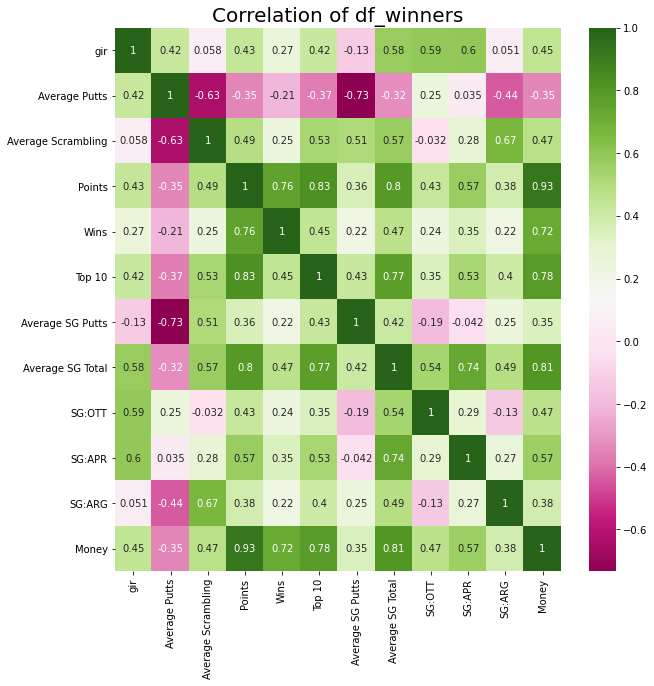

In [28]:
plt.figure(figsize=(10,10))
plt.title('Correlation of df_winners', size = 20)
sns.heatmap(winners_corr.corr(), annot=True, cmap='PiYG')

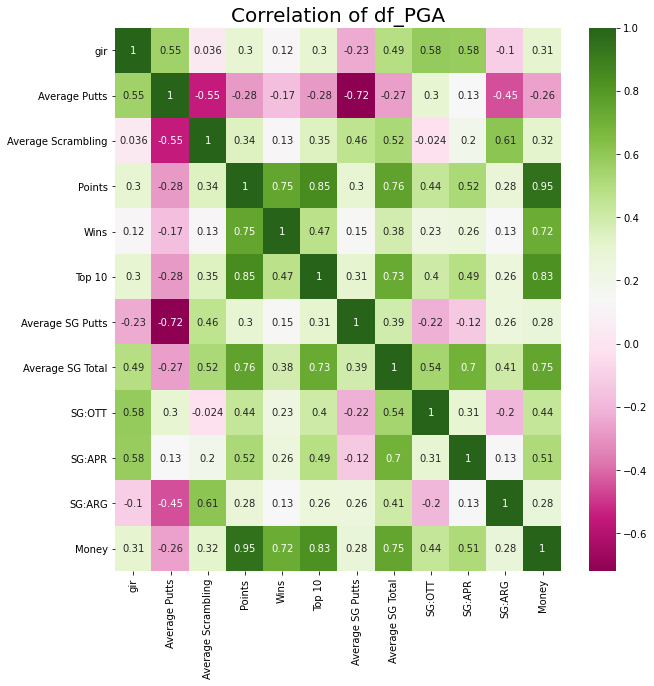

In [31]:
plt.figure(figsize=(10,10))
plt.title('Correlation of df_PGA', size = 20)
sns.heatmap(PGA_corr.corr(), annot=True, cmap='PiYG')

In [ ]:
df_top10.describe()

In [ ]:
winners_corr.describe()

In [ ]:
winners_corr.corr()

In [11]:
PGA_gir = df_PGA.groupby('Year')['gir'].mean()
winners_gir = df_winners.groupby('Year')['gir'].mean()

PGA_SG = df_PGA.groupby('Year')['Average SG Total'].mean()
winners_SG = df_winners.groupby('Year')['Average SG Total'].mean()

PGA_gir.head()

Year
2010    66.908333
2011    65.520860
2012    64.911632
2013    64.991389
2014    64.975114
Name: gir, dtype: float64

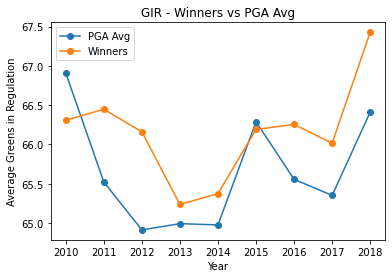

<Figure size 1080x1080 with 0 Axes>

In [21]:
%matplotlib inline

plt.title('GIR - Winners vs PGA Avg')
plt.ylabel('Average Greens in Regulation')
plt.xlabel('Year')

plt.plot(PGA_gir, 'o-', label = 'PGA Avg')
plt.plot(winners_gir, 'o-', label = 'Winners')
plt.legend()

plt.figure(figsize = (15, 15))


plt.show()

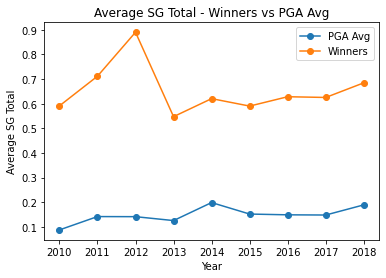

<Figure size 1080x1080 with 0 Axes>

In [20]:
plt.title('Average SG Total - Winners vs PGA Avg')
plt.ylabel('Average SG Total')
plt.xlabel('Year')

plt.plot(PGA_SG, 'o-', label = 'PGA Avg')
plt.plot(winners_SG, 'o-', label = 'Winners')
plt.legend()

plt.figure(figsize = (15,15))


plt.show()

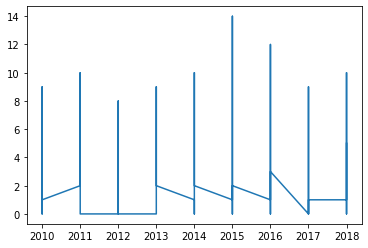

In [10]:
x1 = df_PGA['Year']
y1 = df_PGA['Top 10']

x2 = df_winners['Average SG Total']
y2 = df_winners['Top 10']

plt.plot(x1, y1)

# Model

Text(0, 0.5, 'Top 10 Finishes')

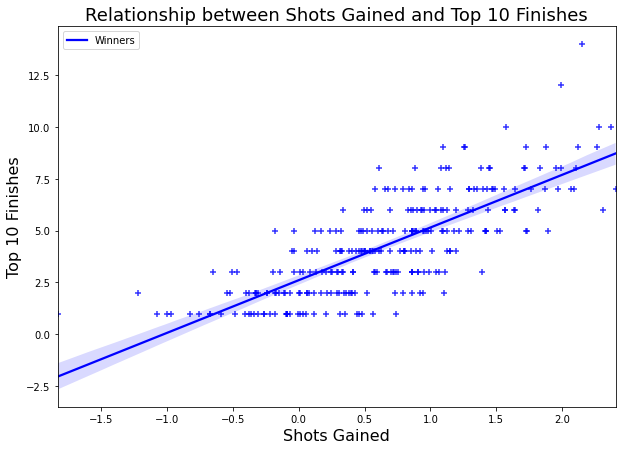

In [24]:
fig = plt.figure(figsize=(10,7))

#PGA_sample = df_PGA.sample(300)
#adding PGA sample because original scatter plot had ~280 data points for df_winners, but over 1600 for df_PGA.. we'll see how it changes results
#this plot is just df_PGA

sns.regplot(x = df_winners['Average SG Total'], y = df_winners['Top 10'], color = 'blue', marker = '+')
#sns.regplot(x = df_PGA['Average SG Total'], y = df_PGA['Top 10'], color = 'magenta', marker = 'x')

plt.legend(labels=['Winners'])
plt.title('Relationship between Shots Gained and Top 10 Finishes', size = 18)
plt.xlabel('Shots Gained', size = 16)
plt.ylabel('Top 10 Finishes', size = 16)

In [ ]:
fig = plt.figure(figsize=(10,7))

PGA_sample = df_PGA.sample(300)
#adding PGA sample because original scatter plot had ~280 data points for df_winners, but over 1600 for df_PGA.. we'll see how it changes results
#maybe take out PGA sample line - confusing and too much info? 

sns.regplot(x = df_winners['Average SG Total'], y = df_winners['Top 10'], color = 'blue', marker = '+')
sns.regplot(x = PGA_sample['Average SG Total'], y = PGA_sample['Top 10'], color = 'magenta', marker = '+')

plt.legend(labels=['PGA Tour'])
plt.title('Relationship between Shots Gained and Top 10 Finishes', size = 24)
plt.xlabel('Shots Gained', size = 18)
plt.ylabel('Top 10 Finishes', size = 18)

In [ ]:
from sklearn import linear_model
#using the same data as sns plot - df_winners. We will calculate coefficients and predictions using sklearn

#x = df_winners[df_winners['Average SG Total']]
#y = df_winners[df_winners['Top 10']]

t10 = linear_model.LinearRegression()

t10.fit(df_winners[['Average SG Total']], df_winners['Top 10'])

print ('Coefficients: ', t10.coef_)
print ('Intercept: ',t10.intercept_)

In [ ]:
print(t10.predict([[-1]]))

In [ ]:
plt.regr(x='Average SG Total', y='Top 10')
plt.ylim(0,)
plt.figure(figsize=(20,20))

In [ ]:
df_PGA.corr()['Average SG Total']

In [ ]:
df_PGA['Top 10'].describe()

In [ ]:
df_PGA['Money'].describe()

In [ ]:
df_money = df_PGA['Money']
df_money.head()